# **Driving Omnichannel Conversion Through Clickstream Intelligence**

## **Objective:**

The overarching objective of this project is to understand how customers - in this case, **pregnant women** specifically - browse, engage, and make decisions on products across a certain time period of the year (April to August), and to then translate those patterns into actionable retail decisions in terms of pricing, layout optimization, improved marketing, etc.

## **In this project:** there will be an increased focus on *Experimental Thinking*, as is Crucial in Decision Science

Example: "If we move premium products above the fold, conversion may increase by X%."


---

## The Data:

Source: UC Irvine Machine Learning Repository

The dataset contains information on clickstream from online store offering clothing for pregnant women. Data are from five months of 2008 and include, among others, product category, location of the photo on the page, country of origin of the IP address, and product price in US dollars ($).

---

Variables:

1. YEAR (2008)

========================================================

2. MONTH -> from April (4) to August (8)

========================================================

3. DAY -> day number of the month

========================================================

4. ORDER -> sequence of clicks during one session

========================================================

5. COUNTRY -> variable indicating the country of origin of the IP address with the
following categories:

* 1-Australia
* 2-Austria
* 3-Belgium
* 4-British Virgin Islands
* 5-Cayman Islands
* 6-Christmas Island
* 7-Croatia
* 8-Cyprus
* 9-Czech Republic
* 10-Denmark
* 11-Estonia
* 12-unidentified
* 13-Faroe Islands
* 14-Finland
* 15-France
* 16-Germany
* 17-Greece
* 18-Hungary
* 19-Iceland
* 20-India
* 21-Ireland
* 22-Italy
* 23-Latvia
* 24-Lithuania
* 25-Luxembourg
* 26-Mexico
* 27-Netherlands
* 28-Norway
* 29-Poland
* 30-Portugal
* 31-Romania
* 32-Russia
* 33-San Marino
* 34-Slovakia
* 35-Slovenia
* 36-Spain
* 37-Sweden
* 38-Switzerland
* 39-Ukraine
* 40-United Arab Emirates
* 41-United Kingdom
* 42-USA
* 43-biz (*.biz)
* 44-com (*.com)
* 45-int (*.int)
* 46-net (*.net)
* 47-org (*.org)

========================================================

6. SESSION ID -> variable indicating session id (short record)

========================================================

7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
* 1-trousers
* 2-skirts
* 3-blouses
* 4-sale

========================================================

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product
(217 products)

========================================================

9. COLOUR -> colour of product

* 1-beige
* 2-black
* 3-blue
* 4-brown
* 5-burgundy
* 6-gray
* 7-green
* 8-navy blue
* 9-of many colors
* 10-olive
* 11-pink
* 12-red
* 13-violet
* 14-white

========================================================

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

* 1-top left
* 2-top in the middle
* 3-top right
* 4-bottom left
* 5-bottom in the middle
* 6-bottom right

========================================================

11. MODEL PHOTOGRAPHY -> variable with two categories:

* 1-en face
* 2-profile

========================================================

12. PRICE -> price in US dollars

========================================================

13. PRICE 2 -> variable informing whether the price of a particular product is higher than
the average price for the entire product category

* 1-yes
* 2-no

========================================================

14. PAGE -> page number within the e-store website (from 1 to 5)

========================================================

Citation:

£apczyÒski M., Bia≥owπs S. (2013) Discovering Patterns of Users' Behaviour in an E-shop -
Comparison of Consumer Buying Behaviours in Poland and Other European Countries,
ìStudia Ekonomiczneî, nr 151, ìLa sociÈtÈ de l'information : perspective europÈenne et
globale : les usages et les risques d'Internet pour les citoyens et les consommateursî, p. 144-
153.



---


## 🧠 Key Questions to Answer

* Which product categories & price ranges drive engagement?

* Does photo placement influence clicks and purchases?

* Are there behavioral differences by country/device context?

* What patterns predict high conversion VS bounce?



---



## Data Loading, Organization, & Preparation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/e-shop clothing 2008.csv', sep = ';')


display(df.head())
print('')
print(df.info())

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), objec

In [3]:
# Confirming any NULLs

for i in df.isnull().sum().index:
  if df.isnull().sum()[i] > 0:
    print(f"{i}: {df.isnull().sum()[i]}") # Perfect - all Values are non-NULL!

df.drop_duplicates(inplace = True)

In [4]:
# Converting these Columns into Categorical ones

cat_cols = ['year', 'month', 'country', 'colour', 'session ID', 'location', 'model photography', 'page 1 (main category)', 'price 2', 'page']

for col in cat_cols:
  df[col] = df[col].astype(object)

In [5]:
# Ordering the needed Categorical Columns

df['day'] = pd.Categorical(df['day'], categories = [i for i in range(1, 32)], ordered = True)
df['month'] = pd.Categorical(df['month'], categories = [i for i in range(4, 9)], ordered = True)

# display(df['day'].value_counts())
# display(df['month'].value_counts())

In [6]:
# Assurance: Removing any Non-Numeric Characters from Numerical Columns

# for i in ['year', 'order', 'price']:
#   df[i] = df[i].str.replace(r'\D', '', regex = True)

In [7]:
print("Summary Statistics for Numerical Variables:\n")
display(df.select_dtypes(include = 'number').describe(percentiles = [0.2, 0.4, 0.6, 0.8, 0.9, 0.99]).T)

print("\nSummary Statistics for Categorical Variables:\n")
display(df.select_dtypes(include = 'object').describe().T)

Summary Statistics for Numerical Variables:



,count,mean,std,min,20%,40%,50%,60%,80%,90%,99%,max
order,165474.0,9.817476,13.478411,1.0,2.0,4.0,6.0,7.0,14.0,23.0,66.0,195.0
price,165474.0,43.802507,12.548131,18.0,33.0,38.0,43.0,43.0,57.0,62.0,82.0,82.0



Summary Statistics for Categorical Variables:



,count,unique,top,freq
year,165474,1,2008,165474
country,165474,47,29,133963
session ID,165474,24026,22433,195
page 1 (main category),165474,4,1,49742
page 2 (clothing model),165474,217,B4,3579
colour,165474,14,2,29764
location,165474,6,1,34532
model photography,165474,2,1,122439
price 2,165474,2,1,84695
page,165474,5,1,93452


## Analysis & Feature Engineering:

In [8]:
df.head(5)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [9]:
# Feature Engineering: by Binning

df['price category'] = pd.qcut(df['price'], q = 5, labels = ['Cheap', 'Affordable', 'Mid', 'High', 'Expensive'])
df['week'] = pd.cut(df['day'], bins = [0, 7, 14, 21, 28, 31], labels = ['First Week', 'Second Week', 'Third Week', 'Fourth Week', 'Last Week'])

In [10]:
# Feature Engineering: Attaching Labels to the Latter Months within the Time Frame

# Creating a Temporary Column for Future Purposes
df['month number'] = df.apply(lambda x: str(x['month']) + 'A' if x['month'] <= 6 else str(x['month']) + 'B', axis = 1)

import re

# Let's Actually Split this into a Separate Column that Indicates "Phase of Recording"

df['month'] = df['month number'].apply(lambda x: re.split(r'(\D+)', x)[0]).astype(object)
df['month phase'] = df['month number'].apply(lambda x: re.split(r'(\D+)', x)[1] if len(re.split(r'(\D+)', x)) > 1 else '')

df.drop(columns = 'month number', inplace = True)

df.sample(7)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,price category,week,month phase
16687,2008,4,9,2,9,2417,1,A2,3,1,1,43,2,1,Mid,Second Week,A
89102,2008,6,5,7,29,12999,1,A5,3,2,1,43,2,1,Mid,First Week,A
79850,2008,5,28,2,9,11566,1,A13,1,5,1,28,2,1,Cheap,Fourth Week,A
42174,2008,4,26,8,29,6038,1,A12,2,4,1,38,2,1,Affordable,Fourth Week,A
117557,2008,7,2,10,29,17281,4,P11,4,4,2,38,1,1,Affordable,First Week,B
150921,2008,7,31,4,29,22051,1,A42,6,2,1,28,2,3,Cheap,Last Week,B
118042,2008,7,2,29,29,17361,4,P43,7,3,2,38,1,3,Affordable,First Week,B


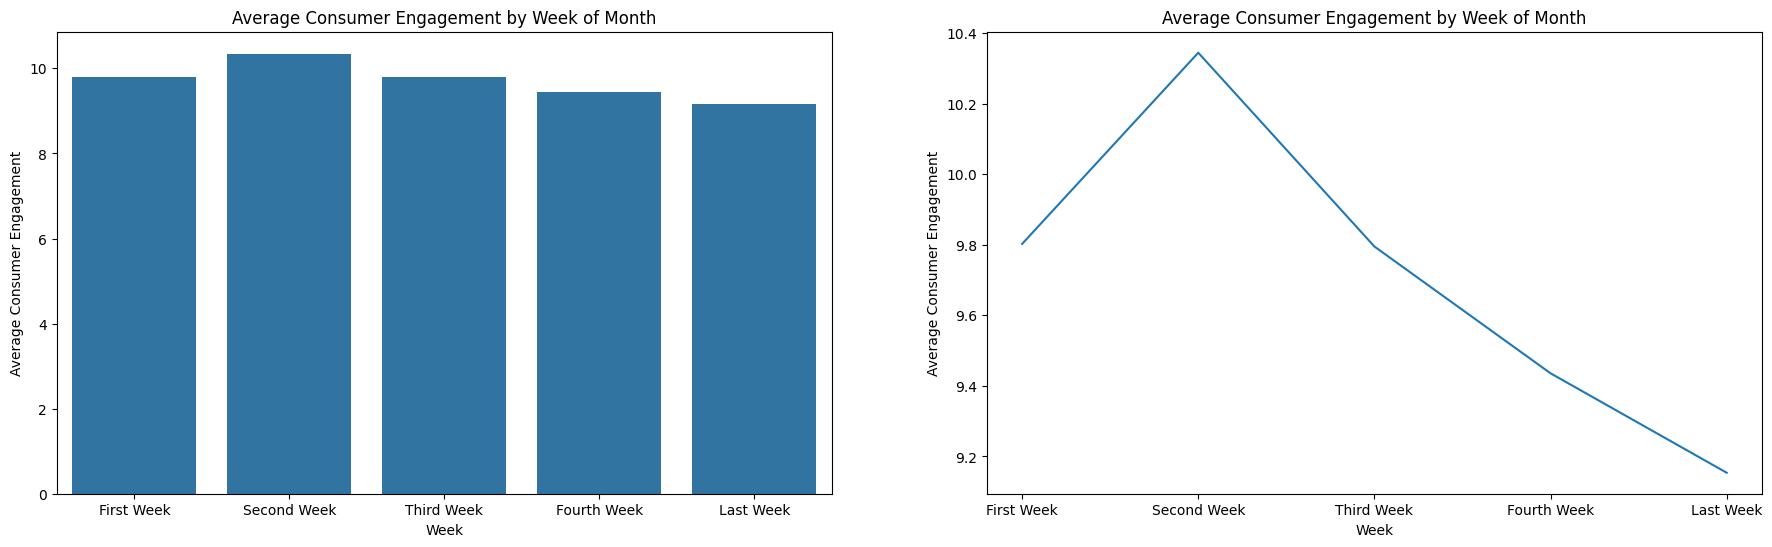

In [11]:
# Average Consumer Engagement [Measured by "Clicks" (order) to View each Product) by Week of Month
# Using the "Average" Measure as the Last Week of the Month has fewer Days so it is Better to Measure after Normalization

plt.figure(figsize = (22, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = df.groupby('week')['order'].mean().index, y = df.groupby('week')['order'].mean().values)
plt.xlabel('Week')
plt.ylabel('Average Consumer Engagement')
plt.title('Average Consumer Engagement by Week of Month')

plt.subplot(1, 2, 2)
sns.lineplot(x = df.groupby('week')['order'].mean().index, y = df.groupby('week')['order'].mean().values)
plt.xlabel('Week')
plt.ylabel('Average Consumer Engagement')
plt.title('Average Consumer Engagement by Week of Month')

plt.show() # Not Much of a Difference does Week of Month make

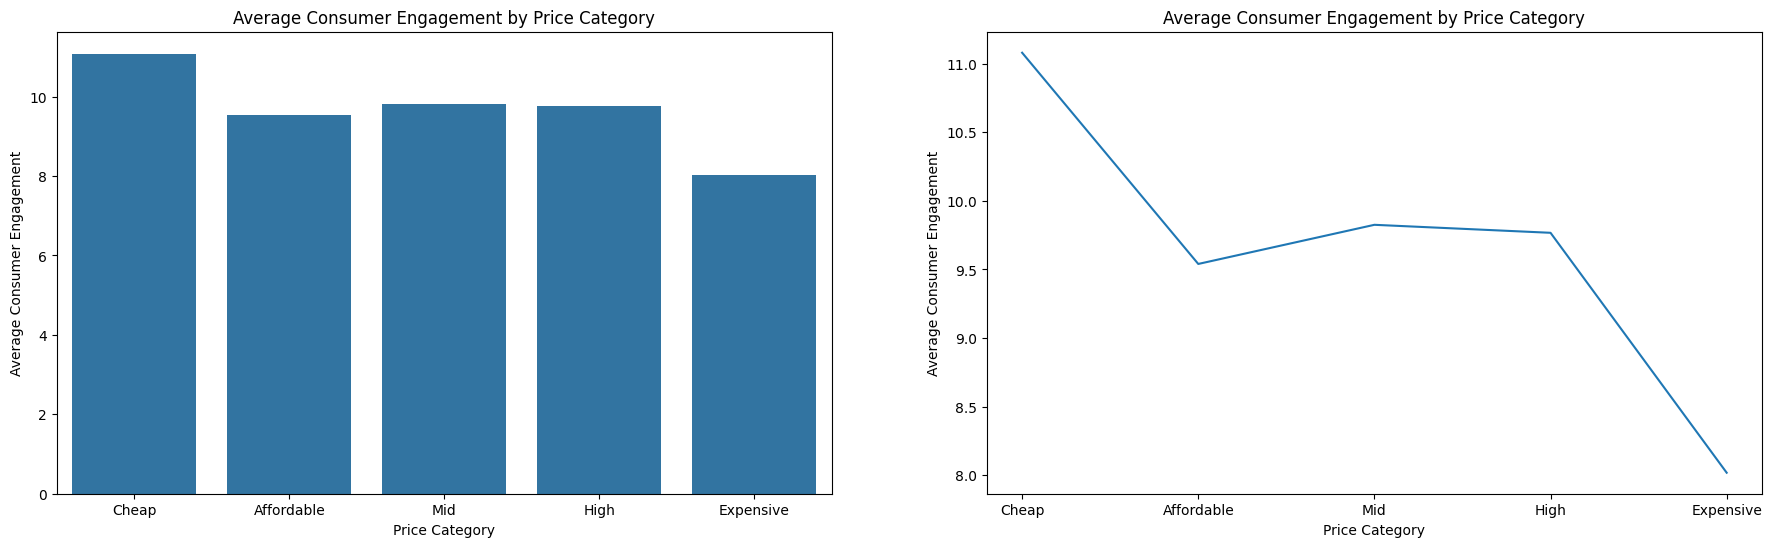

In [12]:
plt.figure(figsize = (22, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = df.groupby('price category')['order'].mean().index, y = df.groupby('price category')['order'].mean().values)
plt.xlabel('Price Category')
plt.ylabel('Average Consumer Engagement')
plt.title('Average Consumer Engagement by Price Category')

plt.subplot(1, 2, 2)
sns.lineplot(x = df.groupby('price category')['order'].mean().index, y = df.groupby('price category')['order'].mean().values)
plt.xlabel('Price Category')
plt.ylabel('Average Consumer Engagement')
plt.title('Average Consumer Engagement by Price Category')

plt.show()

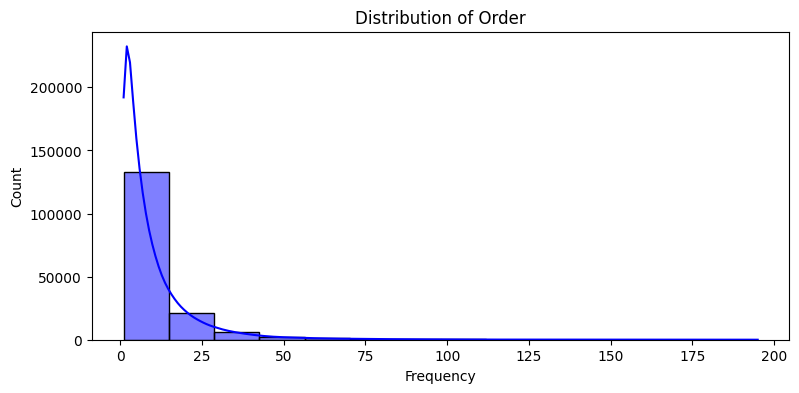

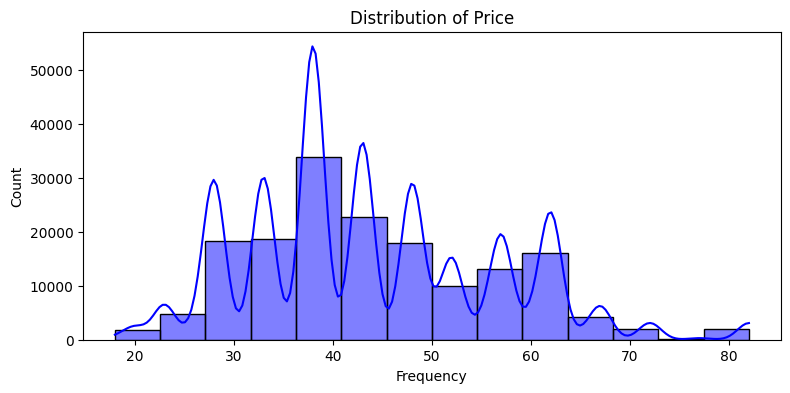

In [13]:
# Let's also check the Distributions within the Numerical Columns

for i in df.select_dtypes(include = 'number').columns:
  plt.figure(figsize = (9, 4))
  sns.histplot(df[i], kde = True, bins = 14, color = 'blue')
  plt.xlabel('Frequency')
  plt.title(f"Distribution of {i.title()}")
  plt.show()

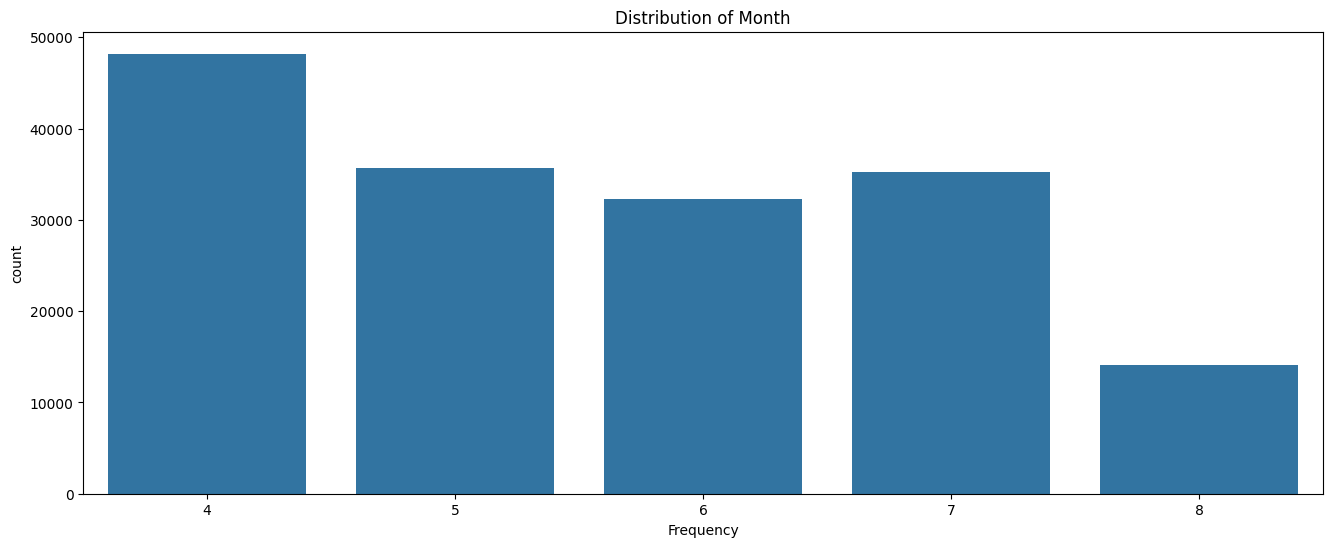

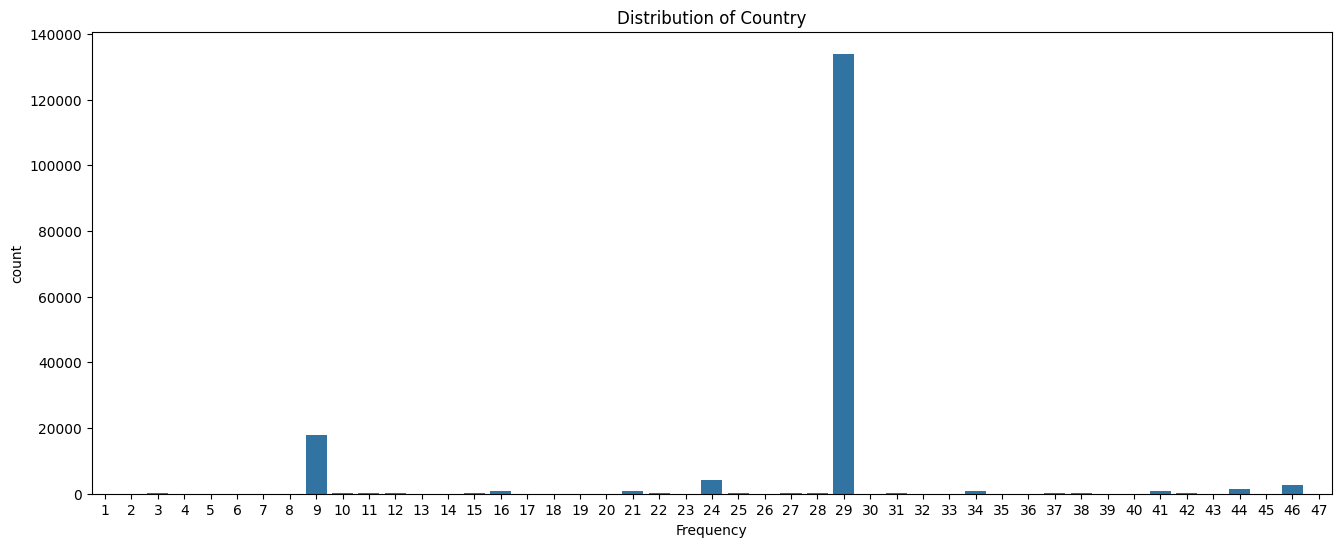

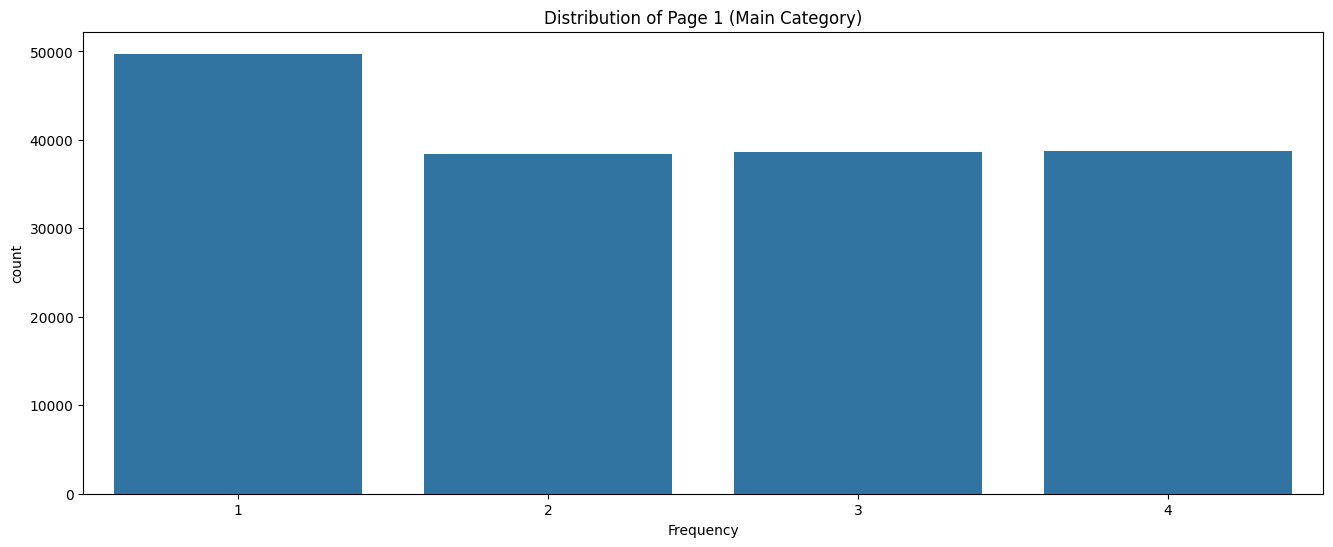

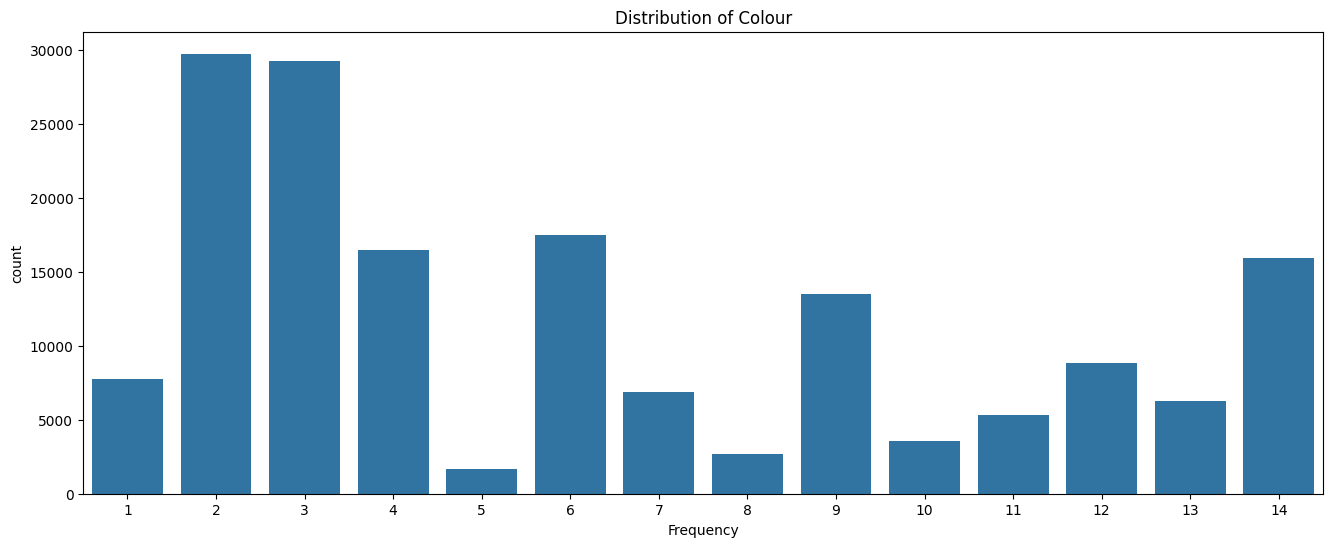

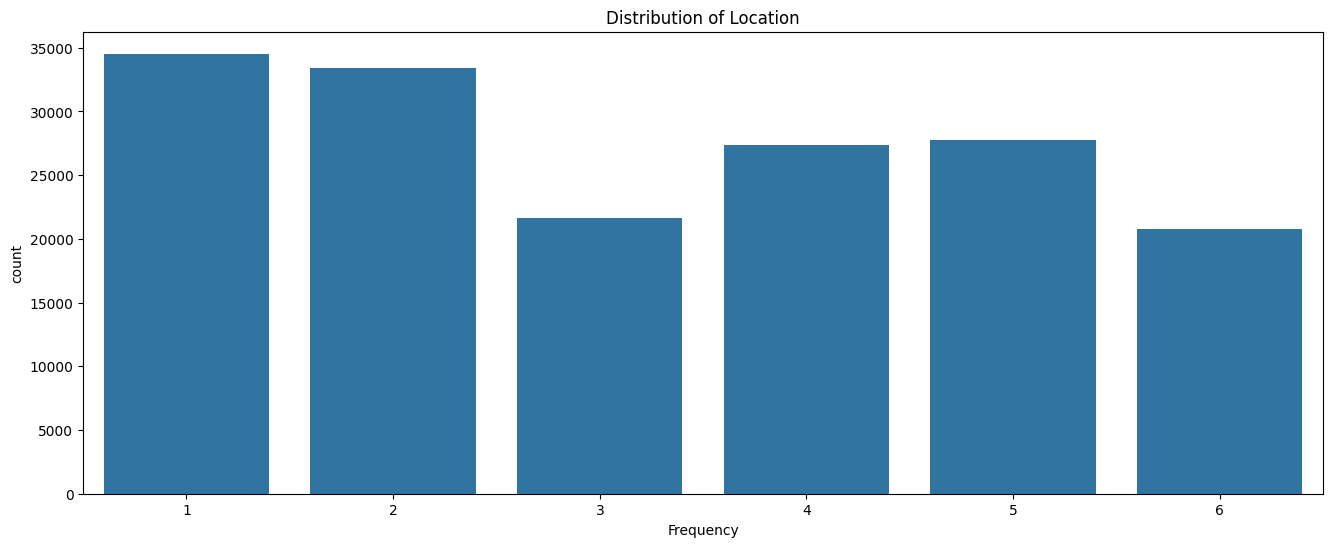

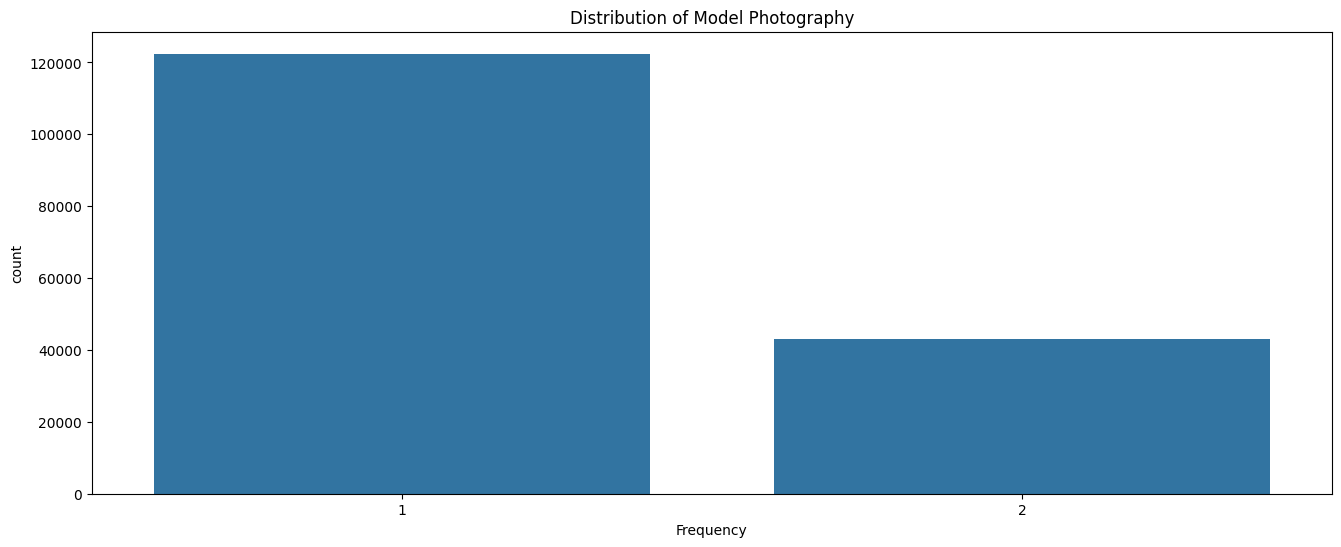

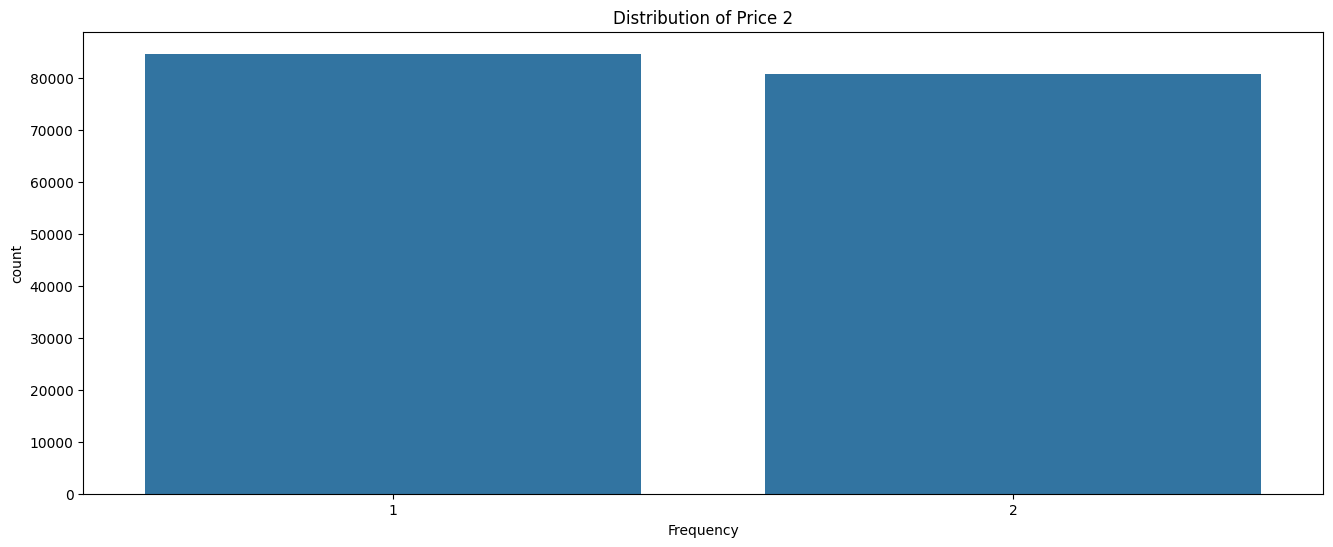

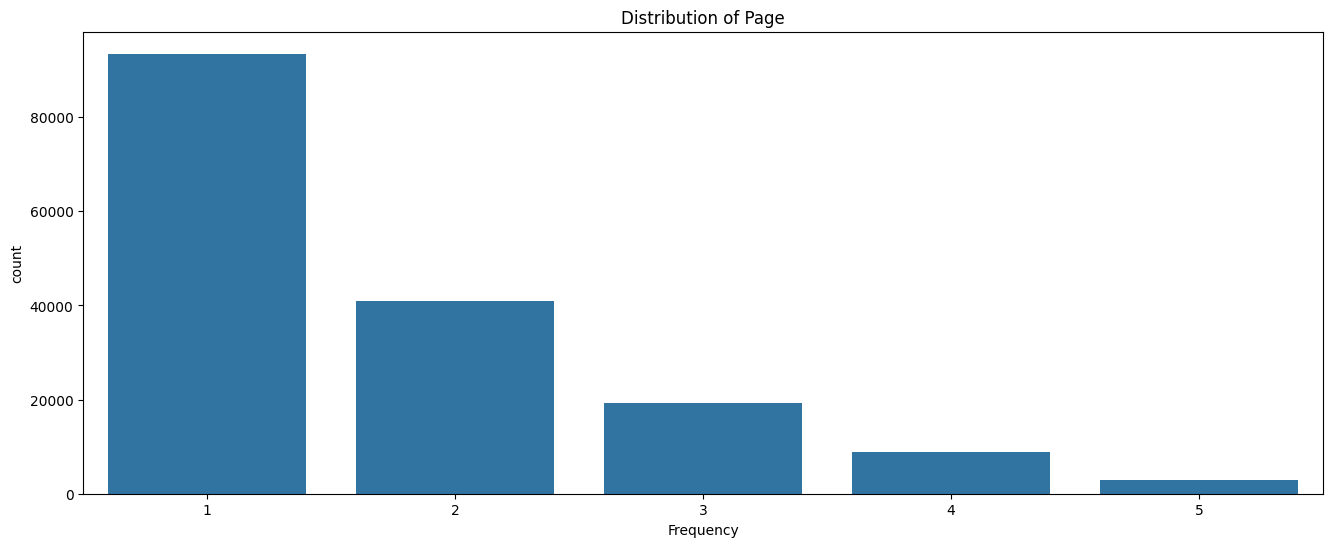

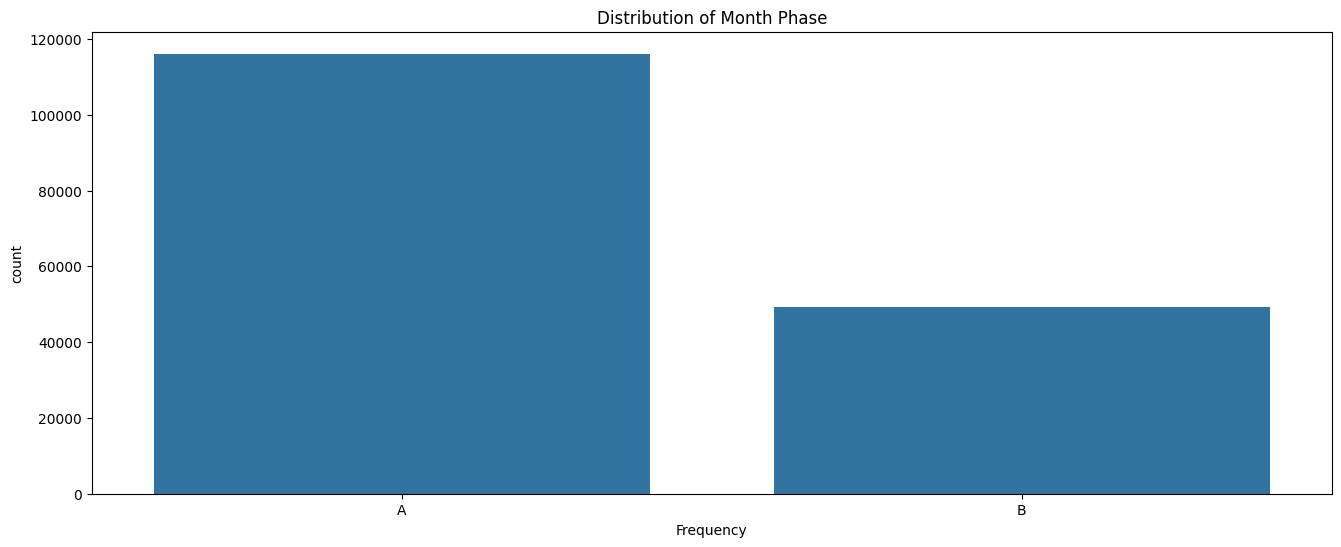

In [14]:
# Let's Check the Distributions of the Object/Categorical Columns as well

# Columns to Exclude from Plotting
exclude_cols = ['year', 'page 2 (clothing model)', 'session ID']

# Getting all Object columns and Filtering out the Excluded ones
object_cols_to_plot = [col for col in df.select_dtypes(include = 'object').columns if col not in exclude_cols]

for i in object_cols_to_plot:
  plt.figure(figsize = (16, 6))
  sns.countplot(x = df[i])
  plt.xlabel('Frequency')
  plt.title(f"Distribution of {i.title()}")
  plt.show()

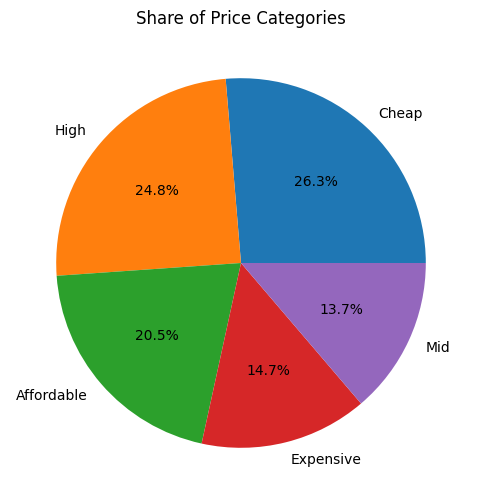

In [23]:
plt.figure(figsize = (12, 6))
plt.pie(df['price category'].value_counts(), labels = df['price category'].value_counts().index, autopct = '%1.1f%%')
plt.title('Share of Price Categories')
plt.show() # This can be a Very Crucial Visual - helps see How Products have been Priced and can be Used to then Predict Further Customer Behavior

In [15]:
# Saving the File for Further Analyses & Modeling, etc.

# from google.colab import drive
# drive.mount('/content/drive')

# df.to_csv('/content/drive/MyDrive/model_ready_clickstream_data.csv')